## Comparing the Best Classification Models
This final notebook is used to compare the best models after we individually tried to do feature engineering, feature selection and hyperparameter tuning to the different classification techniques (e.g. SVM, Random Forest..), to obtain the best model for each classification technique.


#### The goal is to compare and select the best model.

In [1]:
#!pip install --upgrade scikit-learn==1.2.1 --user
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from Utils import plotMetricsGraphComparison # Custom plotting method to compare metrics between models
from FeatureSelectionUtils import import_final_selected_features_from_csv # To import the selected features for each model


In [2]:
# Initialise test_metrics dataframe to keep metrics of the different models
test_metrics = pd.DataFrame(columns=['Classification Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])

# Load in feature engineered data
X_train = pd.read_csv('Data/X_train_engineered.csv')
X_test = pd.read_csv('Data/X_test_engineered.csv')
Y_train = pd.read_csv('Data/y_train_undersampled_data.csv')
Y_test = pd.read_csv('Data/y_test.csv')

print("Train Set :", Y_train.shape, X_train.shape)
print("Test Set  :", Y_test.shape, X_test.shape)

Train Set : (20392, 1) (20392, 75)
Test Set  : (8176, 1) (8176, 75)


In [9]:
import joblib

# Step 1: Load all the best model from each classification models with the best feature selection and hyperparameter tuning done
BestModels = {
    'Best Random Forest': joblib.load('FinalModels/BestRandomForest.pkl'),
    'Best Decision Tree': joblib.load('FinalModels/BestDecisionTree.pkl'),
    'Best Gradient Boosting': joblib.load('FinalModels/BestGradientBoosting.pkl'),
    'Best LightGBM': joblib.load('FinalModels/BestLightGBM.pkl'),
}

# Map each model to their corresponding feature selecction file
BestModels_featureselection_files = {
    'Best Random Forest': 'FinalModels/Feature_Selection/Best Random Forest_selected_features.csv',
    'Best Decision Tree': 'FinalModels/Feature_Selection/Best Decision Tree_selected_features.csv',
    'Best Gradient Boosting': 'FinalModels/Feature_Selection/Best Gradient Boosting_selected_features.csv',
    'Best LightGBM': 'FinalModels/Feature_Selection/Best LightGBM_selected_features.csv',
}


# Step 2: Load feature selections and evaluate models
test_metrics = pd.DataFrame()
for model_name, model in BestModels.items():
    # Load the corresponding feature selection CSV
    feature_selection_csv_path = BestModels_featureselection_files[model_name]
    selected_features = import_final_selected_features_from_csv(feature_selection_csv_path)
    X_test_feature_selected = X_test[selected_features]
    
    # Predict the output based on our training and testing dataset
    Y_test_pred = model.predict(X_test_feature_selected)
    
    test_metric = {
        "Classification Model": model_name,
        "Accuracy": accuracy_score(Y_test, Y_test_pred),
        "Precision": precision_score(Y_test, Y_test_pred),
        "Recall": recall_score(Y_test, Y_test_pred),
        "F1 Score": f1_score(Y_test, Y_test_pred)
    }
    
    # Save to overall metrics dataframe for comparison later
    test_metrics = pd.concat([test_metrics, pd.DataFrame.from_records([test_metric])], ignore_index = True)


c:\Users\suyat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\suyat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator RandomForestClassifier from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
c:\Users\suyat\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator DecisionTreeClassifier fro

In [10]:
test_metrics

,Classification Model,Accuracy,Precision,Recall,F1 Score
0,Best Random Forest,0.823386,0.582296,0.500595,0.538363
1,Best Decision Tree,0.804428,0.525665,0.505351,0.515308
2,Best Gradient Boosting,0.825709,0.586649,0.517241,0.549763
3,Best LightGBM,0.829379,0.598897,0.516647,0.554740


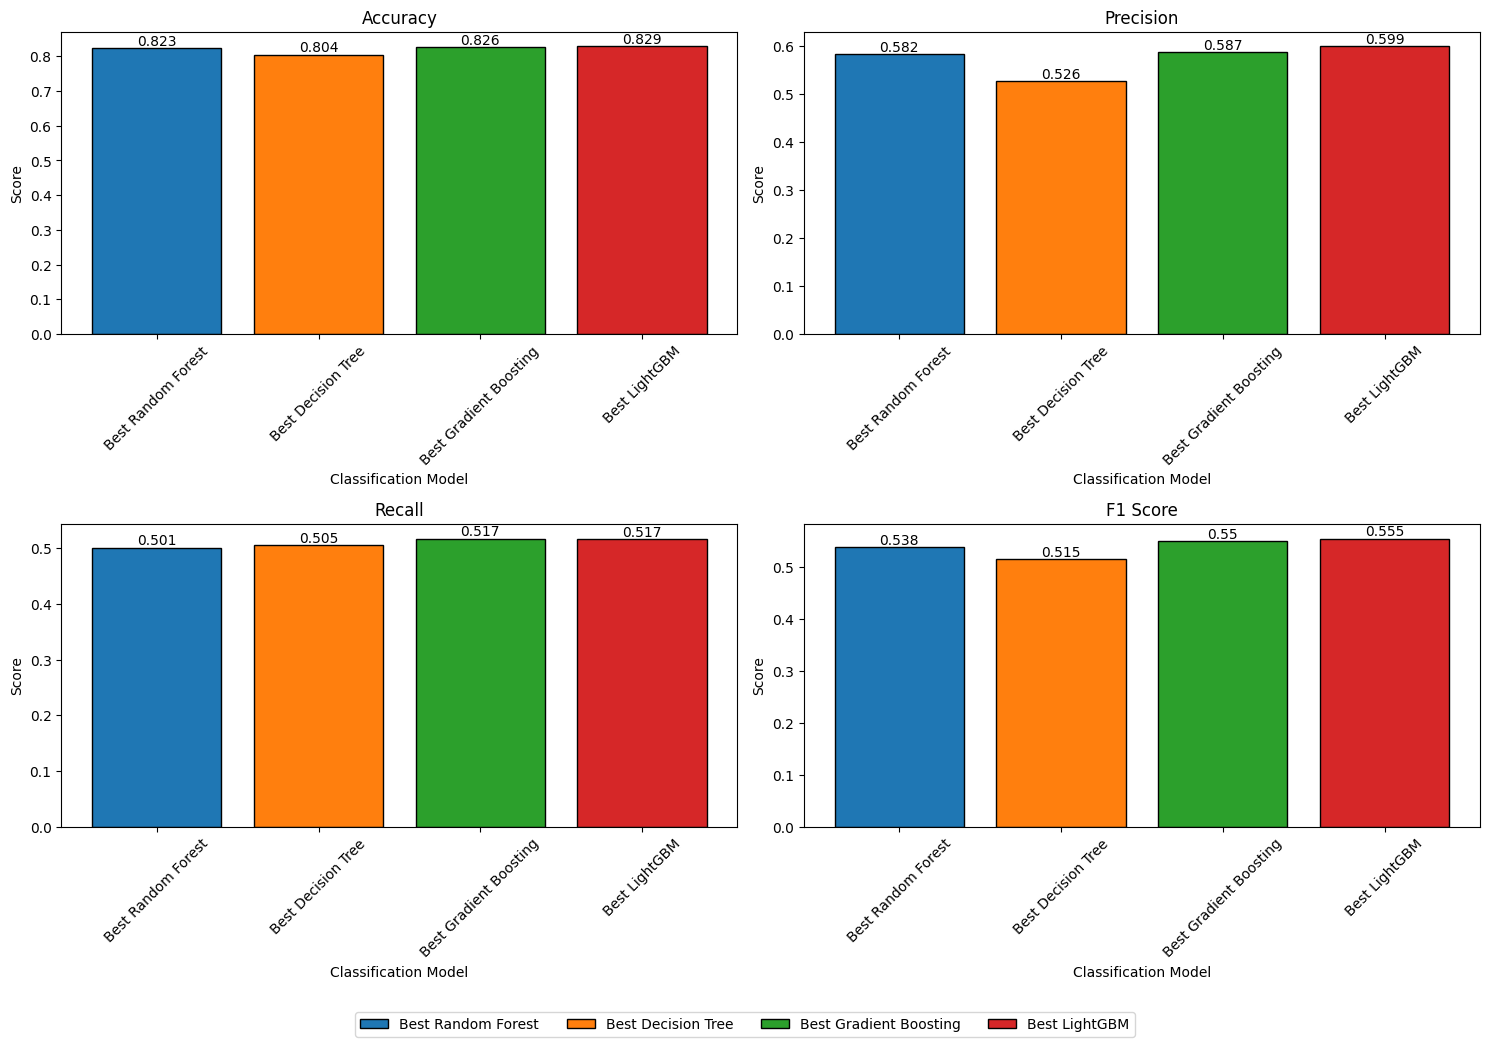

In [11]:
plotMetricsGraphComparison(test_metrics)